Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


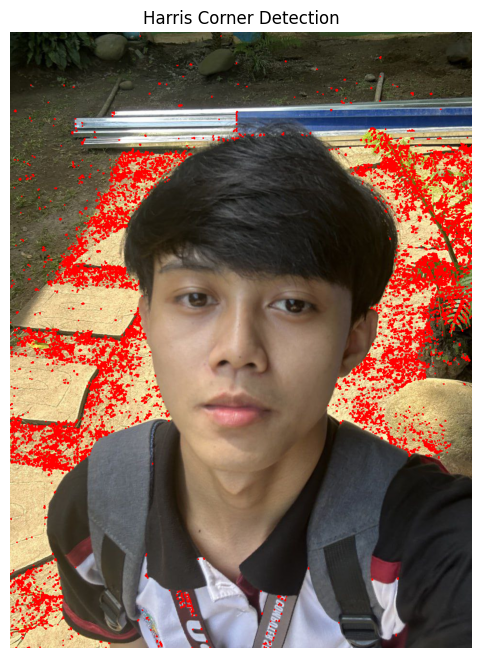

In [7]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the image from Google Drive
image_path = '/content/drive/MyDrive/Carlo.jpg'
img = cv2.imread(image_path)

if img is None:
    print('Image not found. Check the path and try again.')
else:
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Convert to float32
    gray_float = np.float32(gray)

    # Apply Harris Corner Detection
    dst = cv2.cornerHarris(src=gray_float, blockSize=2, ksize=3, k=0.04)

    # Dilate the result to mark the corners
    dst = cv2.dilate(dst, None)

    # Threshold to detect strong corners
    threshold = 0.01 * dst.max()
    img[dst > threshold] = [0, 0, 255]

    # Convert BGR to RGB for Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image with corners
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.title('Harris Corner Detection')
    plt.axis('off')
    plt.show()


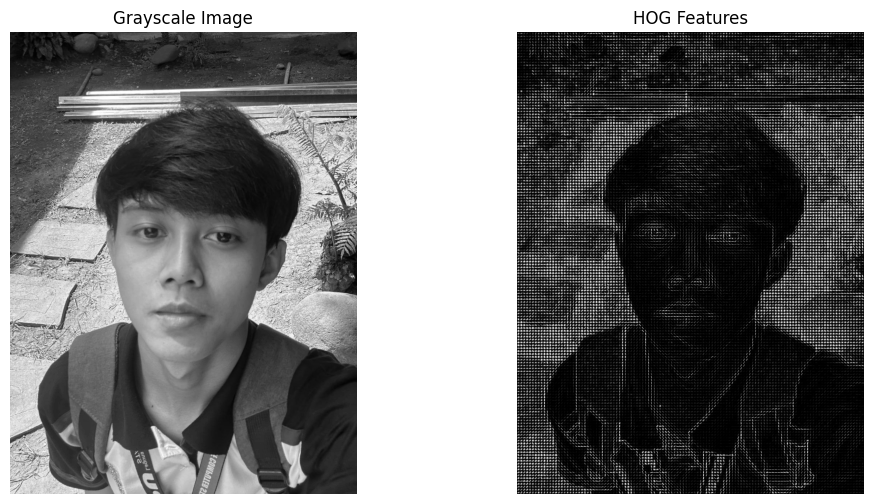

In [9]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
%matplotlib inline

# Load the image
image_path = '/content/drive/MyDrive/Carlo.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Image not found. Please check the path.")
else:
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply HOG descriptor
    features, hog_image = hog(
        gray_image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        visualize=True
    )

    # Adjust HOG image for better contrast
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Display original and HOG images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    ax1.imshow(gray_image, cmap='gray')
    ax1.set_title('Grayscale Image')
    ax1.axis('off')

    ax2.imshow(hog_image_rescaled, cmap='gray')
    ax2.set_title('HOG Features')
    ax2.axis('off')

    plt.show()


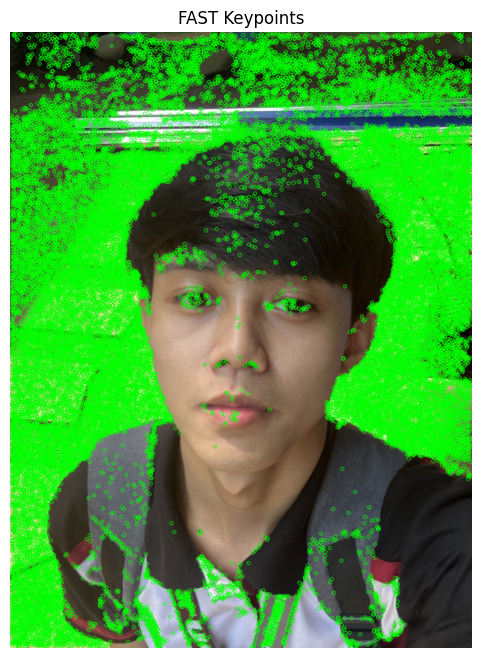

In [10]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Load the image
image_path = '/content/drive/MyDrive/Carlo.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Image not found. Please check the path.")
else:
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize the FAST feature detector
    fast = cv2.FastFeatureDetector_create()

    # Detect keypoints
    keypoints = fast.detect(gray_image, None)

    # Draw keypoints on the original image
    image_with_keypoints = cv2.drawKeypoints(
        image, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # Convert BGR to RGB for displaying with Matplotlib
    image_with_keypoints_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)

    # Display the image with keypoints
    plt.figure(figsize=(10, 8))
    plt.imshow(image_with_keypoints_rgb)
    plt.title('FAST Keypoints')
    plt.axis('off')
    plt.show()


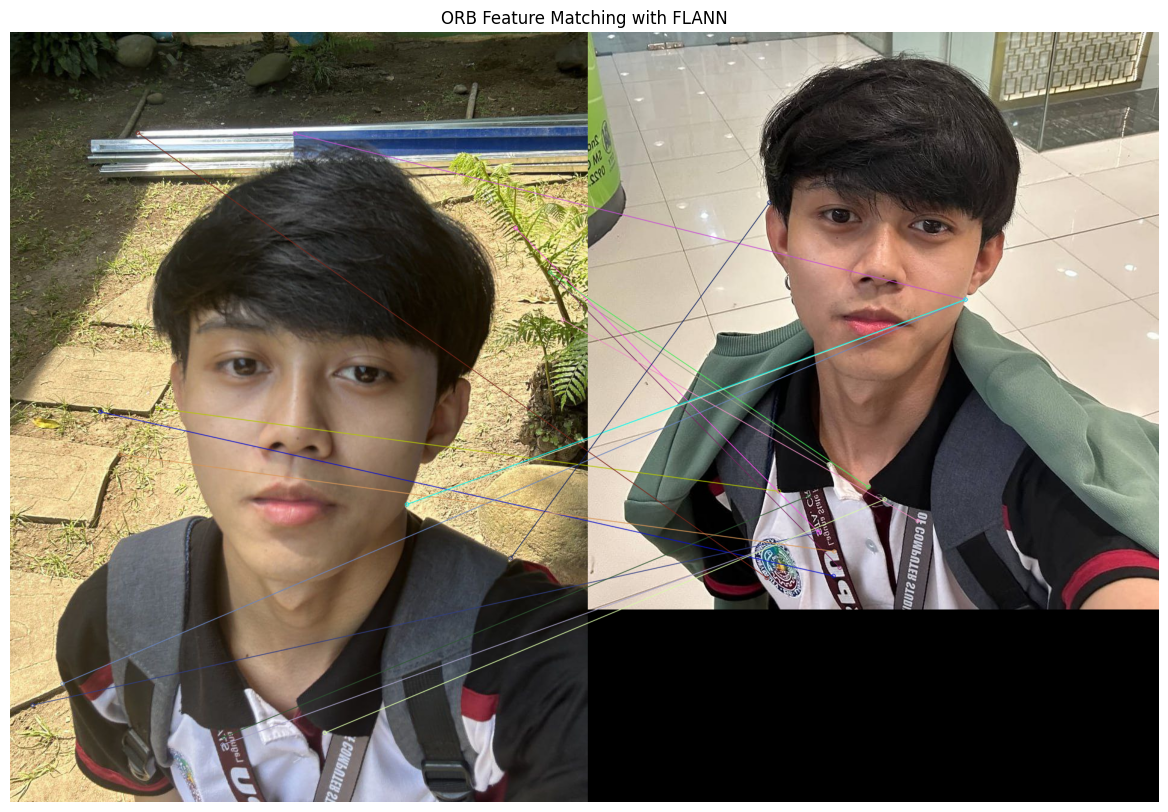

In [11]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Load the images
image1_path = '/content/drive/MyDrive/Carlo.jpg'
image2_path = '/content/drive/MyDrive/Carlos.jpg'

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

if image1 is None or image2 is None:
    print("One or both images not found. Please check the paths.")
else:
    # Convert to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect and compute keypoints and descriptors
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Define FLANN parameters
    FLANN_INDEX_LSH = 6
    index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
    search_params = dict(checks=50)

    # Initialize FLANN-based matcher
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Match descriptors
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Draw matches
    matched_image = cv2.drawMatches(
        image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    # Convert BGR to RGB for displaying with Matplotlib
    matched_image_rgb = cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB)

    # Display the matched features
    plt.figure(figsize=(15, 10))
    plt.imshow(matched_image_rgb)
    plt.title("ORB Feature Matching with FLANN")
    plt.axis('off')
    plt.show()


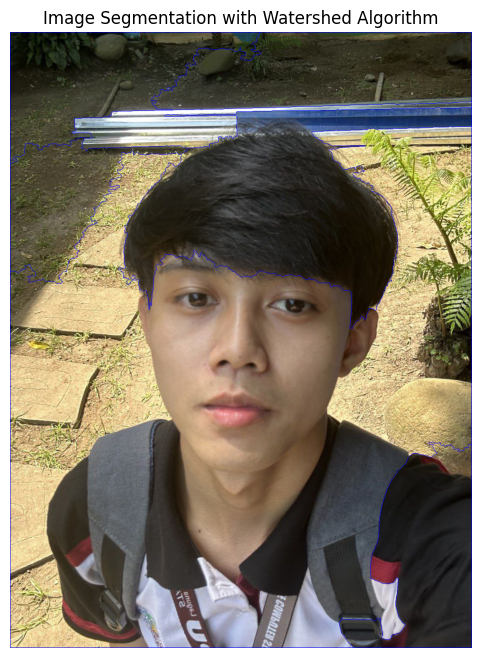

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the image
image_path = '/content/drive/MyDrive/Carlo.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Image not found. Please check the path.")
else:
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply binary threshold
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Remove noise
    kernel = np.ones((3, 3), np.uint8)
    cleaned_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Dilate to get sure background area
    sure_bg = cv2.dilate(cleaned_image, kernel, iterations=3)

    # Use distance transform to get the sure foreground area
    dist_transform = cv2.distanceTransform(cleaned_image, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Identify unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Label markers
    _, markers = cv2.connectedComponents(sure_fg)

    # Add 1 to all labels to mark the background as 1
    markers = markers + 1
    markers[unknown == 255] = 0

    # Apply Watershed algorithm
    markers = cv2.watershed(image, markers)

    # Mark boundaries with red color
    image[markers == -1] = [255, 0, 0]

    # Convert BGR to RGB for displaying
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the result
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.title("Image Segmentation with Watershed Algorithm")
    plt.axis('off')
    plt.show()
